**Student: C0904838, Haldo Somoza**

**Date: Jun 06, 2024**

**GitHub Repository: https://github.com/haldosomoza/2024S-T3-AML-3104-**

---
PROFESSOR INSTRUCTIONS: The aim of this assignment is to process and clean the dataset, generate visualizations, and derive insights from the Algerian forest fire dataset by analyzing the Fire Weather Index (FWI). This analysis will involve utilizing multiple linear regression, polynomial regression, and regularization models. Additionally, the assignment will include performing cross-validation and hyperparameter tuning to evaluate the model's performance. After developing the model, you will create pickle files and test the model on unseen data.

Please ensure you upload the .pynb file directly to Moodle; do not submit it as a zip file. Additionally, upload the work to GitHub as well.

---
### 1. Data Cleaning and Preprocessing

In [591]:
import pandas as pd
import numpy  as np

In [592]:
# Loading the dataset
df = pd.read_csv('2024-05-30 - Assignment 1, Algerian_forest_fires_cleaned.csv')

In [593]:
# Displaying the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [594]:
# Displaying first top rows to familiarize myself with the dataset
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0


In [595]:
# Displaying random rows to familiarize myself with the dataset
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
12,13,6,2012,27,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2,not fire,0
20,21,6,2012,30,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,fire,0
106,15,9,2012,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0,not fire,0
51,22,7,2012,28,79,18,0.1,73.4,16.4,79.9,1.8,21.7,2.8,not fire,0
204,23,8,2012,36,43,16,0.0,91.2,46.1,137.7,11.5,50.2,24.5,fire,1
46,17,7,2012,29,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,fire,0
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,0
216,4,9,2012,30,66,15,0.2,73.5,4.1,26.6,1.5,6.0,0.7,not fire,1
144,23,6,2012,33,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,not fire,1
80,20,8,2012,35,68,19,0.0,88.3,25.9,130.6,8.8,34.7,16.8,fire,0


In [596]:
# Displaying the statistics to understand the dataset 
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [597]:
# By my preference, I would like to move the target column 'FWI' to the last column
col_to_move = df.pop('FWI')
df.insert(len(df.columns), 'FWI', col_to_move)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,not fire,0,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,not fire,0,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,not fire,0,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,not fire,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,not fire,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,fire,1,6.5
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,not fire,1,0.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,not fire,1,0.2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,not fire,1,0.7


In [598]:
# Removing Year column because it value is the same for all rows
df.drop(columns=['year'], inplace=True)

In [599]:
# Checking for missing values
df.isnull().sum()       # Resulting in no missing values

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
Classes        0
Region         0
FWI            0
dtype: int64

In [600]:
# Checking for duplicates
df.duplicated().sum()   # Resulting in no duplicates

0

In [601]:
# Converting not numerical columns to numerical
# In this case the column Classes with values 'fire' and 'not fire' will be converted to 1 and 0 respectively
df['Classes'] = df['Classes'].str.strip()
df['Classes'] = df['Classes'].apply(lambda x: 1 if x == 'fire' else 0)
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1,6.5
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1,0.0
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1,0.2
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1,0.7


In [602]:
# Displaying the dataframe to ensure have only numerical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  Classes      243 non-null    int64  
 12  Region       243 non-null    int64  
 13  FWI          243 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 26.7 KB


---
### 2. Data Visualization and Observations

In [603]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

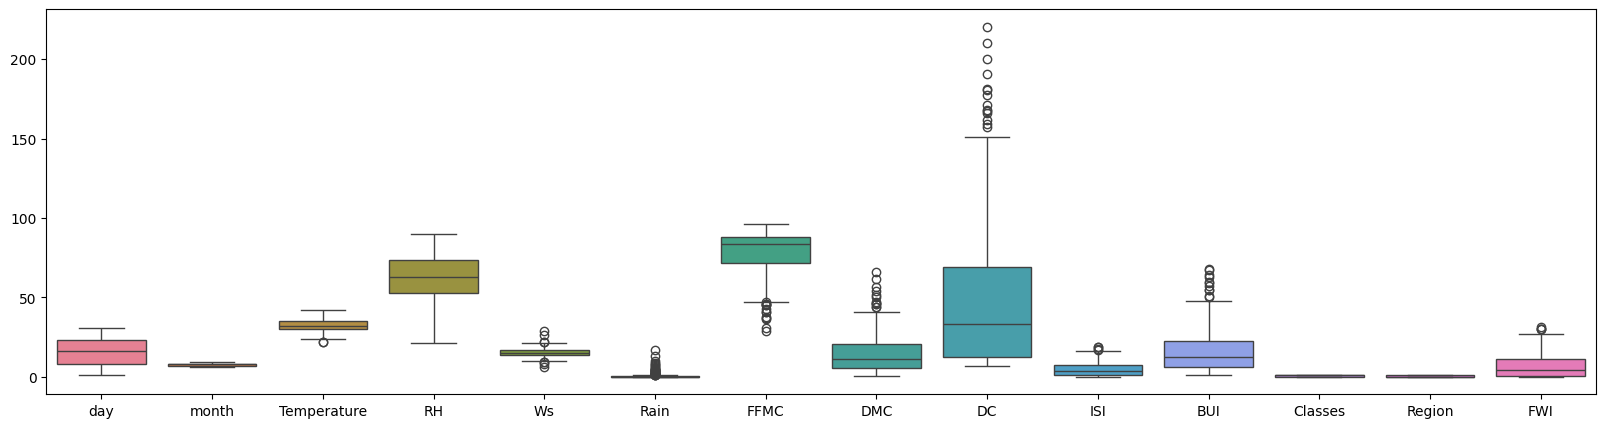

In [604]:
# Drawing box plots to check for outliers
plt.figure(figsize=(20, 5))
sns.boxplot(df)

# Derived from resulting box plots, it is clear that there are outliers in the dataset.
# The main worry is the target column FWI, but browsing the Internet I found that the values are within the expected range: https://cwfis.cfs.nrcan.gc.ca/maps/fw?type=fwi.
# Some similar happened with: DC  (https://cwfis.cfs.nrcan.gc.ca/maps/dc?type=dc),  DMC  (https://cwfis.cfs.nrcan.gc.ca/maps/fw?type=dmc), 
#                             BUI (https://cwfis.cfs.nrcan.gc.ca/maps/fw?type=bui), FFMC (https://cwfis.cfs.nrcan.gc.ca/maps/fw?type=ffmc).

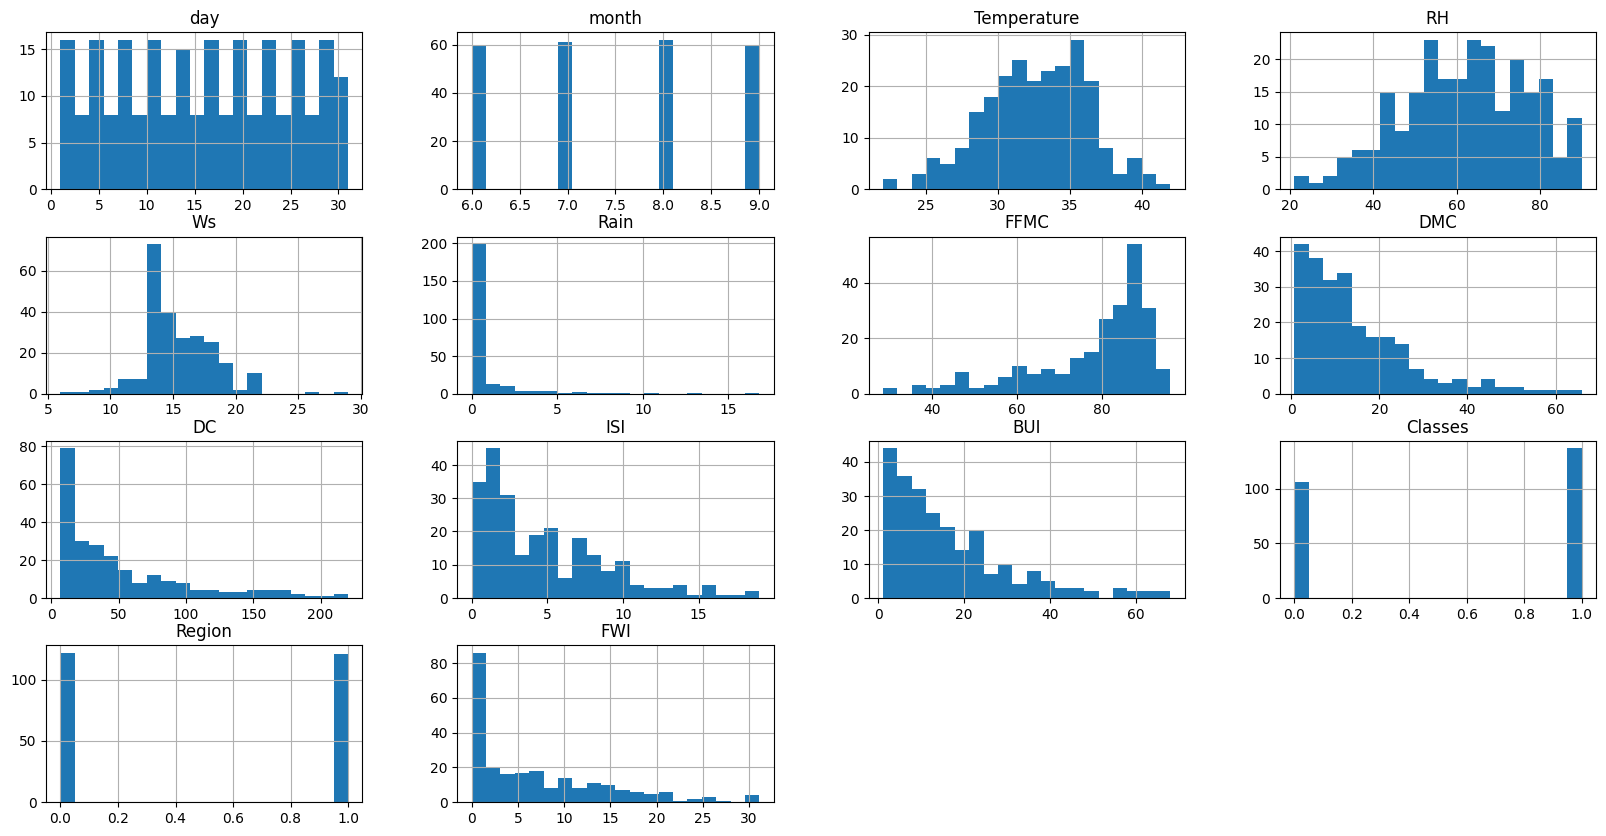

In [605]:
# Plotting histograms for numerical features
df.hist(bins=20, figsize=(20, 10))
plt.show()      # Based on the histograms, the target feature FWI looks like have a relationship with the features: DC, ISI, BUI and DMC.

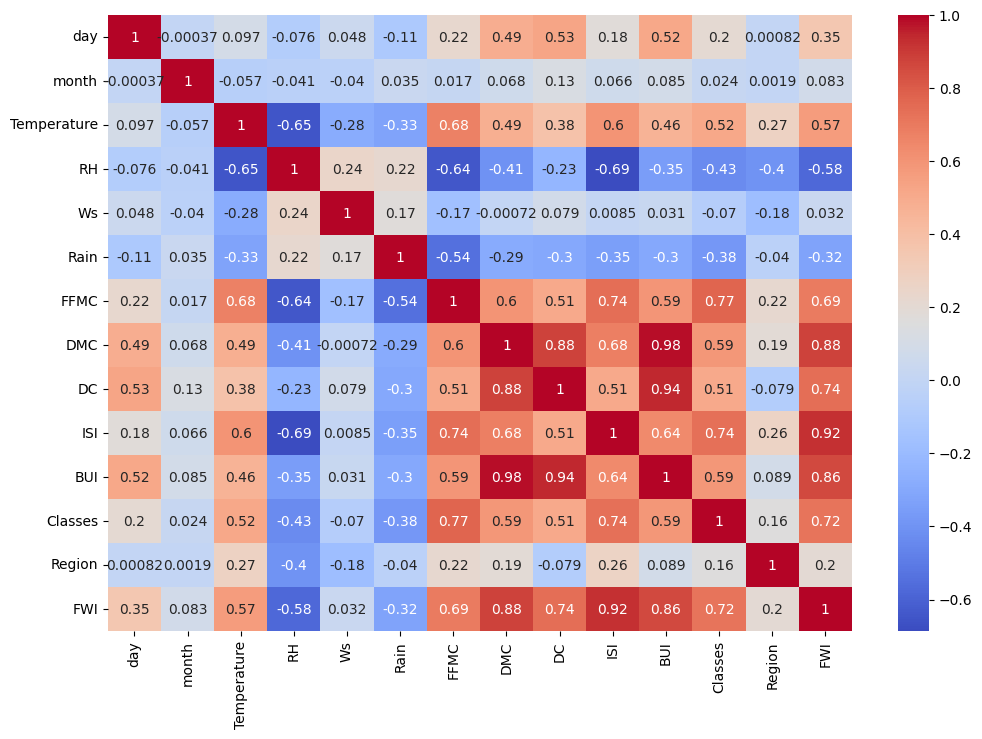

In [606]:
# Showing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [607]:
# Removing columns with similar high correlation to avoid multicollinearity, in this case: ... I'm not sure if I should remove any column.

In [608]:
# Removing columns with low correlation to the target feature FWI, in this case: Ws, Month and Region.
df.drop(columns=['Ws', 'month', 'Region', 'day', 'Rain'], inplace=True)

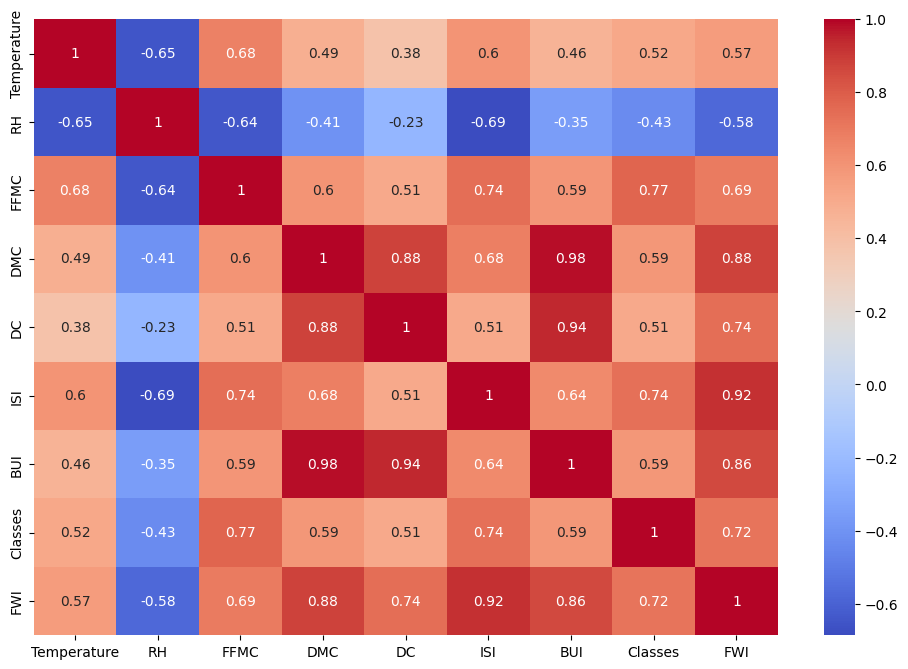

In [609]:
# Showing the correlation matrix again
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

---
### 3. Model Development and Analysis

In [610]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [611]:
# Chosing two random records to apply Step 4 (apply the model to unseen data)
df_random = df.sample(n=2)
df.loc[df_random.index] = np.nan
df.dropna(inplace=True)
df_random

,Temperature,RH,FFMC,DMC,DC,ISI,BUI,Classes,FWI
147,36,62,87.8,16.5,34.5,7.0,16.4,1,9.5
109,32,49,89.4,9.8,33.1,6.8,11.3,1,7.7


In [612]:
# Taking the features and target variables
X = df.drop(['FWI'], axis=1)
y = df['FWI']

In [613]:
# Spliting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [614]:
# Standardizing the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [615]:
# Checking out the input data
# Note: I'm converting the X_train_scaled array to a DataFrame to better visualization
pd.DataFrame(X_train_scaled, columns=X.columns)

,Temperature,RH,FFMC,DMC,DC,ISI,BUI,Classes
0,-1.629204,1.240907,-2.060144,-0.923947,-0.860282,-1.033367,-0.940023,-1.098588
1,0.243893,-1.660610,1.026643,3.591747,2.397933,1.992647,3.152291,0.910259
2,0.511478,0.581471,-0.934458,-0.900710,-0.831683,-0.890406,-0.906480,-1.098588
3,-1.361619,-0.275795,0.793010,0.493501,-0.245409,0.944264,0.280962,0.910259
4,0.511478,0.119866,0.793010,1.980659,2.481686,1.015745,2.273450,0.910259
...,...,...,...,...,...,...,...,...
187,-2.164374,1.306850,-2.322096,-1.086605,-0.868453,-1.081021,-1.047363,-1.098588
188,-1.094033,1.174963,-2.003506,-0.923947,-0.866410,-1.033367,-0.940023,-1.098588
189,-1.896789,0.911189,-2.244219,-1.055623,-0.864367,-1.081021,-1.020528,-1.098588
190,1.314234,-0.473626,0.821329,1.035694,0.355165,0.848957,0.757281,0.910259


In [616]:
# Training with Linear Regression and Predicting with the test data 
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

print(f'Linear Regression, R2 Score: {r2_score           (y_test, y_pred_lr)}')
print(f'Linear Regression, MSE:      {mean_squared_error (y_test, y_pred_lr)}')
print(f'Linear Regression, MAE:      {mean_absolute_error(y_test, y_pred_lr)}')
print(f'Linear Regression, RMSE:     {np.sqrt(mean_squared_error(y_test, y_pred_lr))}')

Linear Regression, R2 Score: 0.9903514540077847
Linear Regression, MSE:      0.46620592779773107
Linear Regression, MAE:      0.4731232862140945
Linear Regression, RMSE:     0.6827927414653228


     Actual  Predicted
24      8.4   8.152178
6       7.2   7.227146
224     3.9   3.821800
210     5.9   8.102827
238     6.5   6.621148
175     0.7   1.411359
199    26.3  24.533444
222     0.3   0.103341
9       0.9   1.644720
114     0.7   1.090304
45      0.4   0.008326
209     6.1   7.342380
227     9.8   9.534361
211    16.0  15.065220
82     20.4  19.043295
145     5.3   5.318361
188     0.6   0.643461
15      0.0  -0.139305
66      6.8   6.545843
128     6.0   6.317174
33      1.7   1.158475
19      0.4   0.170138
108     5.9   6.220505
30      0.4   0.036199
185    20.9  20.940729
172    25.4  23.444658
10      5.6   5.717159
73     10.2   9.879012
93      0.0  -0.029503
156    15.0  14.868709
112     8.3   8.133518
217     0.4  -0.080369
25     10.6  10.152850
60     15.7  15.011927
18      1.4   1.120567
127     3.1   3.307495
96      1.7   1.785269
196     5.5   6.276203
138     0.4   0.130469
240     0.2   0.049177
75      6.3   7.066955
118     4.1   4.005270
113     2.8

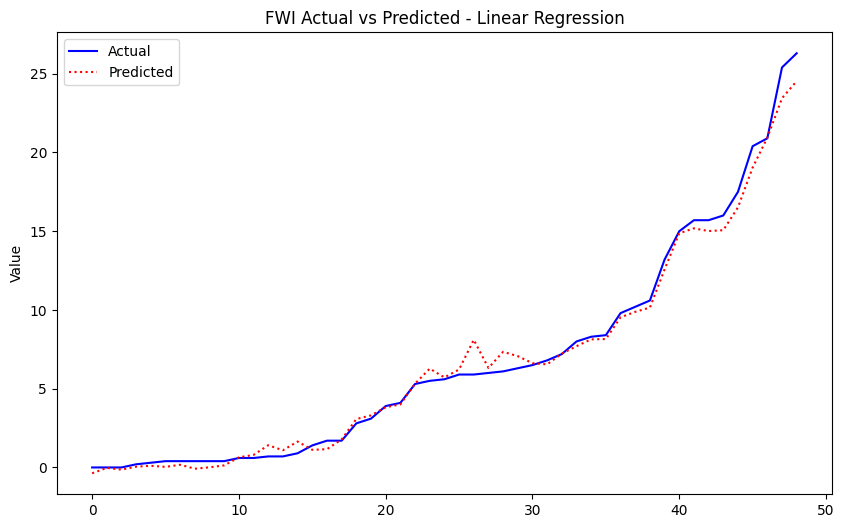

In [617]:
# Showing the actual target values and the results
def show_and_plot_actual_vs_predicted(y_test, y_pred, print_values=True, extra_title=''):
    y_test_actual_vs_pred = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    if (print_values): print(y_test_actual_vs_pred)

    y_test_actual_vs_pred.sort_values('Actual', inplace=True)
    y_test_actual_vs_pred.reset_index(drop=True, inplace=True)

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual_vs_pred['Actual'], label='Actual', color='b')
    plt.plot(y_test_actual_vs_pred['Predicted'], label='Predicted', color='r', linestyle='dotted')
    plt.title('FWI Actual vs Predicted ' + extra_title)
    #plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

show_and_plot_actual_vs_predicted(y_test, y_pred_lr, extra_title='- Linear Regression')

Polynomial Regression, Degree=2, R2 Score: 0.747532362300791
Polynomial Regression, Degree=2, MSE:      12.198927109579614
Polynomial Regression, Degree=2, MAE:      0.7393128064213969
Polynomial Regression, Degree=2, RMSE:     3.4926962521209335


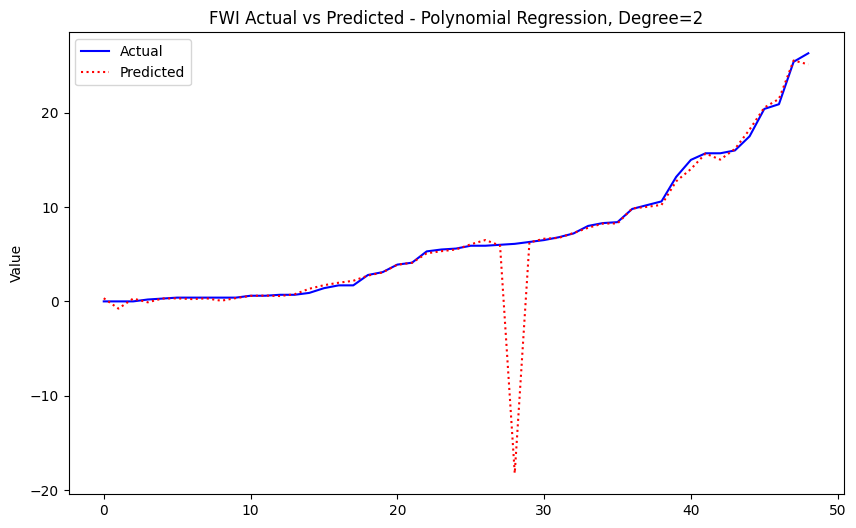

In [618]:
# Training with Polynomial Regression and Predicting with the test data
# Using degree=2
def polynomial_regression(degree=2):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    X_test_poly  = poly_features.transform(X_test_scaled)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    y_pred_pr = poly_reg.predict(X_test_poly)

    print(f'Polynomial Regression, Degree={degree}, R2 Score: {r2_score           (y_test, y_pred_pr)}')
    print(f'Polynomial Regression, Degree={degree}, MSE:      {mean_squared_error (y_test, y_pred_pr)}')
    print(f'Polynomial Regression, Degree={degree}, MAE:      {mean_absolute_error(y_test, y_pred_pr)}')
    print(f'Polynomial Regression, Degree={degree}, RMSE:     {np.sqrt(mean_squared_error(y_test, y_pred_pr))}')

    show_and_plot_actual_vs_predicted(y_test, y_pred_pr, print_values=False, extra_title=f'- Polynomial Regression, Degree={degree}')

polynomial_regression(degree=2)

Polynomial Regression, Degree=3, R2 Score: -358.1161913213898
Polynomial Regression, Degree=3, MSE:      17352.05463053773
Polynomial Regression, Degree=3, MAE:      19.29469416971667
Polynomial Regression, Degree=3, RMSE:     131.72719776317163


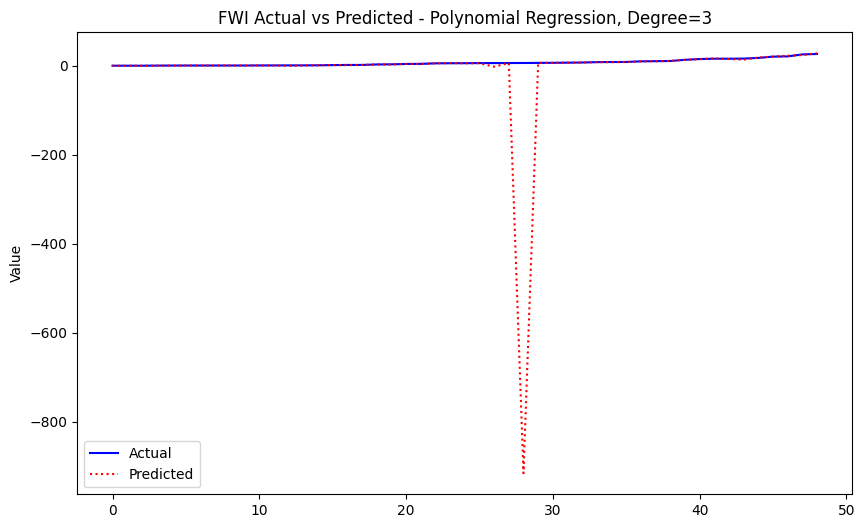

In [619]:
# Training with Polynomial Regression and Predicting with the test data
# Using degree=3
polynomial_regression(degree=3)

Polynomial Regression, Degree=4, R2 Score: 0.9934524402005469
Polynomial Regression, Degree=4, MSE:      0.31637007208941037
Polynomial Regression, Degree=4, MAE:      0.2987860374832857
Polynomial Regression, Degree=4, RMSE:     0.5624678409379601


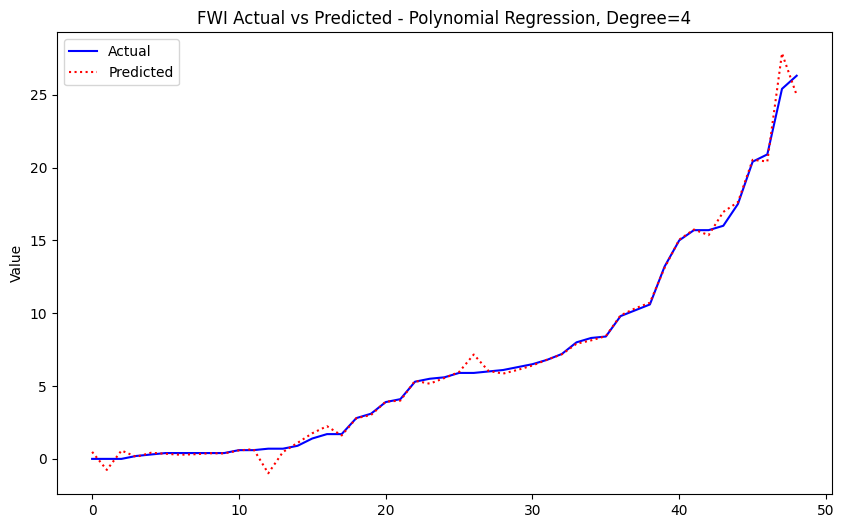

In [620]:
# Training with Polynomial Regression and Predicting with the test data
# Using degree=4
polynomial_regression(degree=4)

Polynomial Regression, Degree=5, R2 Score: 0.9712918516028253
Polynomial Regression, Degree=5, MSE:      1.3871425777167086
Polynomial Regression, Degree=5, MAE:      0.5388159080567734
Polynomial Regression, Degree=5, RMSE:     1.1777701718572722


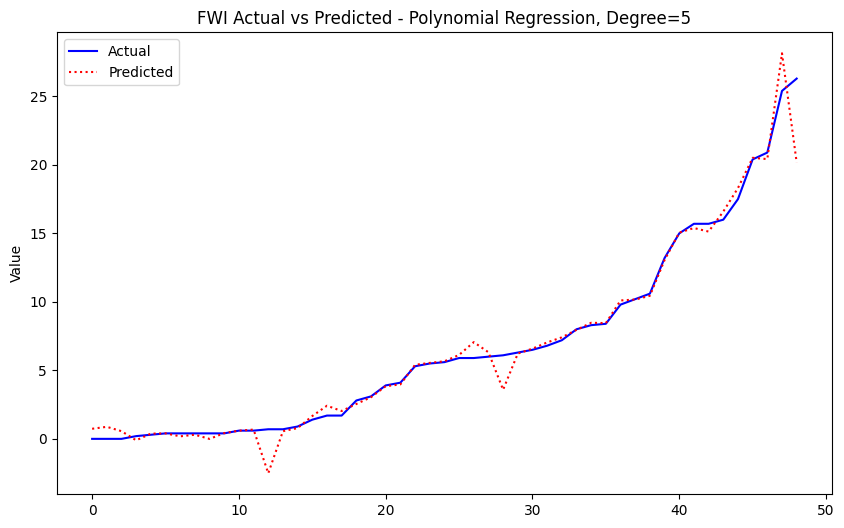

In [621]:
# Training with Polynomial Regression and Predicting with the test data
# Using degree=5
polynomial_regression(degree=5)

In [622]:
# Evaluating the metrics for models: Linear Regression, Ridge, Lasso and Elastic Net
import warnings
warnings.filterwarnings('ignore')

models = { 
    'L.Reg': LinearRegression(), 
    'Ridge': Ridge(), 
    'Lasso': Lasso(), 
    'E.Net': ElasticNet() 
}

params_grids = { 
    'L.Reg': { 'fit_intercept': [True, False] },
    'Ridge': { 'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9] },
    'Lasso': { 'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9] },
    'E.Net': { 'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] }
}

best_estimators = { }
best_scores_r2  = { }
best_scores_mse = { }

for name, model in models.items():
    print(f"Performing Grid Search for {name} ...")

    grid = GridSearchCV(estimator=model, param_grid=params_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)

    best_estimators[name] = grid.best_estimator_
    best_scores_r2 [name] = r2_score(y_test, grid.best_estimator_.predict(X_test))
    best_scores_mse[name] = mean_squared_error(y_test, grid.best_estimator_.predict(X_test))

    print(f"Model evaluated: {name}")
    print(f"Best params:     {grid.best_params_}")
    print(f"Test R2 Score:   {best_scores_r2[name]}")
    print(f"Test MSE:        {best_scores_mse[name]}\n")

Performing Grid Search for L.Reg ...
Model evaluated: L.Reg
Best params:     {'fit_intercept': True}
Test R2 Score:   0.9903514540077846
Test MSE:        0.466205927797734

Performing Grid Search for Ridge ...
Model evaluated: Ridge
Best params:     {'alpha': 0.9}
Test R2 Score:   0.9903643676042886
Test MSE:        0.46558195862722734

Performing Grid Search for Lasso ...
Model evaluated: Lasso
Best params:     {'alpha': 0.3}
Test R2 Score:   0.9823393834587568
Test MSE:        0.8533393660281272

Performing Grid Search for E.Net ...
Model evaluated: E.Net
Best params:     {'alpha': 0.5, 'l1_ratio': 0.1}
Test R2 Score:   0.9820894639581677
Test MSE:        0.8654151702727167



---
### 4. Model Evaluation and Testing
According to the results, the best model is the Linear Regression with the best R2 Score and the best MSE.

This was exactly the first model I tested, so we proceed to save this model.

---
### 4.5. Pickle File Creation and Testing the Model on Unseen Data

In [623]:
# Saving the chosen model to a pickle file for later use
from joblib import dump
dump(scaler,  'UsedSScaler.pkl')
dump(lin_reg, 'ChosenModel.pkl')

['ChosenModel.pkl']

In [624]:
# Loading the saved model from a pickle file
from joblib import load
loaded_scaler = load('UsedSScaler.pkl')
loaded_model  = load('ChosenModel.pkl')

In [625]:
# Seeing the random data that was removed from the dataset
df_random

,Temperature,RH,FFMC,DMC,DC,ISI,BUI,Classes,FWI
147,36,62,87.8,16.5,34.5,7.0,16.4,1,9.5
109,32,49,89.4,9.8,33.1,6.8,11.3,1,7.7


In [626]:
# Scaling the unseen data
X_unseen = df_random.drop(['FWI'], axis=1)
X_unseen_scaled  = loaded_scaler.transform(X_unseen)
pd.DataFrame(X_unseen_scaled, columns=X.columns)

,Temperature,RH,FFMC,DMC,DC,ISI,BUI,Classes
0,1.046648,-0.012021,0.715132,0.121711,-0.312820,0.539207,-0.041056,0.910259
1,-0.023692,-0.869287,0.828409,-0.397245,-0.341419,0.491554,-0.383200,0.910259


In [627]:
# Predicting with unseen data, and visualizing the results
y_pred_unseen = lin_reg.predict(X_unseen_scaled)
df_random['Predicted'] = y_pred_unseen
df_random

,Temperature,RH,FFMC,DMC,DC,ISI,BUI,Classes,FWI,Predicted
147,36,62,87.8,16.5,34.5,7.0,16.4,1,9.5,9.308627
109,32,49,89.4,9.8,33.1,6.8,11.3,1,7.7,7.750879


---
### 5. Documentation and Submission

- Comments included in the code and in markdown cells.
- Code submitted into GitHub repository: https://github.com/haldosomoza/2024S-T3-AML-3104-